<a href="https://colab.research.google.com/github/isabelveit/Predictive-Modeling-Project-Palmer-Penguins-Dataset/blob/main/PIC_16A_Project_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Project**
Group Members:
* Astrid Alkire
* Isabel Veit
* Sonya Surapaneni

## Group Contributions Statement

We all helped with the data import and cleaning section. Isabel made the summary tables for the median and mean, Astrid made the summary tables for the island and species, and Sonya made the Correlation Matrix and Island summary table. Isabel made the Body Mass vs. Flipper Length (Species) scatterplot and the Bar Graph of Missing Values per Feature. Astrid made feature scatterplots and boxplots. Sonya made the Histogram of Flipper Length by Species. We did all other tables/figures together. For the models, Astrid did the SVM model, Isabel did the multinomial logistic regression, and Sonya did the KNN model. We all did the discussions for our respective tables and split all other explanations of tables and figures. Sonya and Astrid helped with the final discussion.


## Data Import and Cleaning

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Get rid of warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset
# Read url as csv
url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/refs/heads/main/PIC16A/data/palmer_penguins.csv'
df = pd.read_csv(url)

In [2]:
# Take a quick look at the DataFrame
df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [3]:
# Get some basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

By taking an initial look at the information in the data frame, we can make some preliminary observations. There are **17 columns** in total, with some providing information like the sample number and study name, but most giving values and measurements for various penguin features. Based on this, we can plan to drop the `studyName`, `Sample Number`, `Date Egg`, `Individual ID`, and `Comments` columns because they are informative only, and not relevant to our feature selection. We will also plan to drop the `Sex` and `Clutch Completion` columns because the meaning of these is not something that would affect which species a penguin is. We can also see that there are **344 entries**, which we will keep in mind when cleaning our data in order to maximize the amount of data that we keep. Finally, we can observe that some of the values in the data frame are **NaN(null)**, so we know that we will need to drop or replace these values in the cleaning step.

In [4]:
df["Region"].unique(), df["Stage"].unique()

(array(['Anvers'], dtype=object), array(['Adult, 1 Egg Stage'], dtype=object))

Here, we observe that all of the rows have the same value for columns `Region` and `Stage`, so we will plan to drop those as well as they will not help us evaluate differences between species.

Now that we have determined which columns are relevant to our analysis, we will take only these columns from the DataFrame.

In [5]:
# Extract only relevant columns
df = df[["Species", "Island", "Culmen Length (mm)", "Culmen Depth (mm)",
               "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]

Next, we will take care of any null values present in the data set.

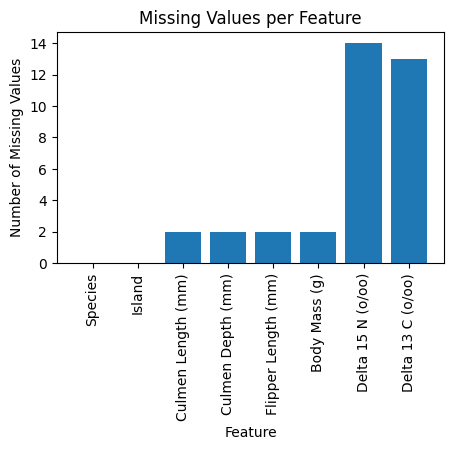

In [6]:
# Checking Null Values

# Count the number of missing values for each feature
missing_data = df.isnull().sum()

# Create a bar graph showing the missing values
plt.figure(figsize=(5, 3))
plt.bar(missing_data.index, missing_data.values)

# Add labels and title
plt.title('Missing Values per Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

This bar graph shows us the number of missing values for each of the features in our data set. We can observe that the most missing values are from the `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` columns.

In [7]:

print(f"No. of Rows Before DropNa: {df.shape[0]}")


# Drop rows with Nan values for all 6 quantitative columns
df = df.dropna(subset=df.columns[-6:], how='all')


# Check how many rows were dropped
print(f"No. of Rows After DropNa: {df.shape[0]}")
# 2 rows were dropped

No. of Rows Before DropNa: 344
No. of Rows After DropNa: 342



We dropped rows where **all 6 quantitative features** were NaN as there was no data to work with. We are okay with this because only two rows were dropped, and this is a relatively small portion from the overall number of rows (344). Next, we will shorten the species names so that when we begin visualizing our data, it will be displayed in a format that is easier to understand.

In [8]:
# Simplify Species Names
df = df.replace({'Species': {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie',
                            'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap',
                            'Gentoo penguin (Pygoscelis papua)': 'Gentoo'}})

At this point, we have taken care of **irrelevant columns** and **null values** in the data set. We also **shortened the species names** to make the data easier to work with. Next, we wil **perform the train-test split BEFORE continuing to clean the data** in order to ensure that we don't tamper our test set.

#### Train-test Split

In [9]:
# Import train-test split
from sklearn.model_selection import train_test_split

# Split the data frame so 80% is in the training set, and 20% is in the testing set
df_train, df_test = train_test_split(df, test_size=0.2)

# Check the shapes
print(f"Training Set Size: {df_train.shape}")
print(f"Test Set Size: {df_test.shape}")

Training Set Size: (273, 8)
Test Set Size: (69, 8)


#### Imputation with Mean, X-train and y-train
Next, we want to do some processing of our data by filling in any remaining null values with their respective column mean. The reasoning is because it **preserves the overall distribution of the data** without losing any rows. This helps in particular with our exploratory analysis later and **preventing extreme outliers** caused by the null values.

In our case, the only columns that have null values after the basic cleaning/dropping are the **Delta 13** and **Delta 15** columns.

In [10]:
def imputation(data, select_cols, avgImputation=pd.Series()):
  """
  Replaces missing values in selected columns with the mean of the corresponding column.

  Parameters:
  data: the data set.
  selected_cols: the columns to impute.

  Returns:
  imputed_data: the updated data set.
  """
  # Find the mean of the first 6 columns using only train set
  data_means = avgImputation if not avgImputation.empty else data[select_cols].mean()

  # Fill NaN values of the train set with the column means
  data[select_cols] = data[select_cols].fillna(data_means)

  # Set result
  imputed_data = data

  return data_means, imputed_data

We started by **creating a function** to perform imputation on data because we need to do it on both the training and test sets. Therefore, **to avoid repeating the process** for both, we can just call the function twice (as seen below). This helps keep our code as efficient as possible.

In [11]:
# Select the columns to fill the NaN values with the mean for
numeric_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)',
                'Flipper Length (mm)', 'Body Mass (g)',
                'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

mean_train, df_train = imputation(df_train, numeric_cols)
_ , df_test = imputation(df_test, numeric_cols, mean_train)

# Split data in X (features) and y (targets)
X_train = df_train.drop(columns=["Species"])
y_train = df_train["Species"]
X_test = df_test.drop(columns=["Species"])
y_test = df_test["Species"]

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (273, 7)
X_test shape: (69, 7)
y_train shape: (273,)
y_test shape: (69,)


Above, we specify the X (features) and y (target) from our training and test sets. As expected, the training set has 273 rows, and the test set has 69 rows. Now that we have cleaned and split the data, we can begin our exploratory analysis.

## Exploratory Analysis


#### Display Tables
We will include **3 different types of display tables** in our analysis. These include summary tables for the median and mean of features, summary tables for the island and species count, and a covariance and correlation matrix.

In [12]:
# Summary table (median)
def summary_table_median(group_cols, value_cols):
    """
    Creates a summary table of median values for the specified columns.

    Parameters:
    group_cols: list of columns
    value_cols: list of columns

    Returns:
    summary: summary table of median values
    """
    # Use groupby to group our our training set by the given columns for group/value
    summary = df_train.groupby(group_cols)[value_cols].median().round(2)
    return summary

# Call the function to see a summary of the median values for the relevant features split by species and island.
summary_table_median(["Species", "Island"], ["Culmen Length (mm)",	"Culmen Depth (mm)",
                                      "Flipper Length (mm)",	"Body Mass (g)",
                                      "Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island                                             
Adelie    Biscoe                  38.20              18.30   
          Dream                   38.90              18.50   
          Torgersen               38.90              18.40   
Chinstrap Dream                   49.55              18.45   
Gentoo    Biscoe                  47.45              15.00   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Species   Island                                                             
Adelie    Biscoe                   189.0         3750.0               8.77   
          Dream                    190.0         3650.0               8.97   
          Torgersen                191.0         3700.0               8.77   
Chinstrap Dream                    196.0         3712.5               9.35   
Gentoo    Biscoe                   217.0         5125.0               8.25   

                     Delta 13 C (o/oo)  
Species   Island                        
Adelie    Biscoe                -26.07  
          Dream                 -25.80  
          Torgersen             -25.82  
Chinstrap Dream                 -24.59  
Gentoo    Biscoe                -26.21

This summary table above **uses df.groupby** to give us an overview of the median values for various penguin features based on the species and island. We can observe that the different features have different ranges of values. One notable characteristic is that the Gentoo penguin has a higher median value for `Flipper Length (mm)` and `Body Mass (g)` in comparison to the other species.

In [13]:
# Summary table (mean)
def summary_table_mean(group_cols, value_cols):
    """
    Creates a summary table of mean values for the specified columns.

    Parameters:
    group_cols: list of columns
    value_cols: list of columns

    Returns:
    summary: summary table of mean values
    """
    # Use groupby to group the training set based on the specified columns for group/value
    summary = df_train.groupby(group_cols)[value_cols].mean().round(2)
    return summary

# Call the function to see the mean values for the selected features grouped by species and island
summary_table_mean(["Species", "Island"], ["Culmen Length (mm)",	"Culmen Depth (mm)",
                                      "Flipper Length (mm)",	"Body Mass (g)",
                                      "Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island                                             
Adelie    Biscoe                  38.81              18.46   
          Dream                   38.70              18.28   
          Torgersen               39.05              18.43   
Chinstrap Dream                   48.95              18.44   
Gentoo    Biscoe                  47.64              15.03   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Species   Island                                                             
Adelie    Biscoe                  188.58        3725.81               8.81   
          Dream                   189.64        3725.53               8.96   
          Torgersen               191.62        3703.21               8.76   
Chinstrap Dream                   195.72        3747.41               9.30   
Gentoo    Biscoe                  217.73        5110.46               8.24   

                     Delta 13 C (o/oo)  
Species   Island                        
Adelie    Biscoe                -25.88  
          Dream                 -25.69  
          Torgersen             -25.77  
Chinstrap Dream                 -24.54  
Gentoo    Biscoe                -26.17

This summary table above is very similar to the first, but shows the mean values for various penguin features rather than the median values. By assessing the tables visually, we can observe that the values are not notably different. The two tables above are **useful in our modeling decisions** because they help use make sense of the possible values for each feature, and further our understanding of the data set. This can prevent mistakes being made by allowing us to catch any instances where we may get a value for one of the features that does not match what is reflected in the tables.

In [14]:
# Summary table (islands)
def summary_table_islands(group_cols, value_cols):
    """
    Creates a summary table of number of values for the specified columns and rows.

    Parameters:
    group_cols: list of columns
    value_cols: list of columns

    Returns:
    summary: summary table of number of values for the specified columns and rows.
    """
    # Use groupby to split the training set based on the given values for group and value columns
    # We're using unstack here to pivot the Islands to the horizontal axis of the table
    summary = df_train.groupby(group_cols)[value_cols].count().unstack(fill_value=0)
    return summary

# Call the function
summary_table_islands(["Species", "Island"], ["Species"])

Species                
Island     Biscoe Dream Torgersen
Species                          
Adelie         31    47        39
Chinstrap       0    58         0
Gentoo         98     0         0

In [15]:
# Count based on species
df_train.groupby("Species").size()

,0
Species,
Adelie,117
Chinstrap,58
Gentoo,98


From the two similar tables above, we can observe that there are differences in which species appear on which island. We will keep this in mind when choosing our features because it seems like island would be a good indicator of species. Also, we can see that this is an unbalanced problem because there is a different number of samples available for each species. However, this is not a large concern for us.

In [16]:
# Import display

# Select columns
selected_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
df_selected = df_train[selected_columns]

# Calculate covariance matrix
covariance_matrix = df_selected.cov().round(4)

# Display the matrix
print("Covariance Matrix:\n")
display(covariance_matrix)

# Calculate correlation matrix
correlation_matrix = df_selected.corr().round(4)

# Display the matrix
print("\nCorrelation Matrix:\n")
display(correlation_matrix)

Covariance Matrix:



,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),29.9278,-2.4311,50.3118,2565.2333,-0.2063,0.8327
Culmen Depth (mm),-2.4311,3.9140,-16.4130,-755.5884,0.6384,0.6841
Flipper Length (mm),50.3118,-16.4130,203.8905,10084.1558,-3.8288,-4.2465
Body Mass (g),2565.2333,-755.5884,10084.1558,657244.2631,-234.1283,-241.6053
Delta 15 N (o/oo),-0.2063,0.6384,-3.8288,-234.1283,0.2949,0.2413
Delta 13 C (o/oo),0.8327,0.6841,-4.2465,-241.6053,0.2413,0.6301



Correlation Matrix:



,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.0000,-0.2246,0.6441,0.5784,-0.0694,0.1917
Culmen Depth (mm),-0.2246,1.0000,-0.5810,-0.4711,0.5942,0.4356
Flipper Length (mm),0.6441,-0.5810,1.0000,0.8711,-0.4938,-0.3746
Body Mass (g),0.5784,-0.4711,0.8711,1.0000,-0.5318,-0.3754
Delta 15 N (o/oo),-0.0694,0.5942,-0.4938,-0.5318,1.0000,0.5598
Delta 13 C (o/oo),0.1917,0.4356,-0.3746,-0.3754,0.5598,1.0000


The covariance matrix above gives us an idea of the variance for each individual variable as well as the covariance of each possible pair of variables. The correlation matrix informs our understanding of the relationship between variables. For example, we can see that `Flipper Length (mm)` and `Body Mass (g)` are positively correlated. We will keep correlations like this in mind when choosing our features, because we may not want to pick features that are strongly correlated positively or negatively. Instead, we will try to pick features that do not have a strong correlation and therefore have less of a chance of predicting each other.

#### Figures
We will include **3 different types of figures** in our analysis. This will include scatter plots, boxplots, and histograms.


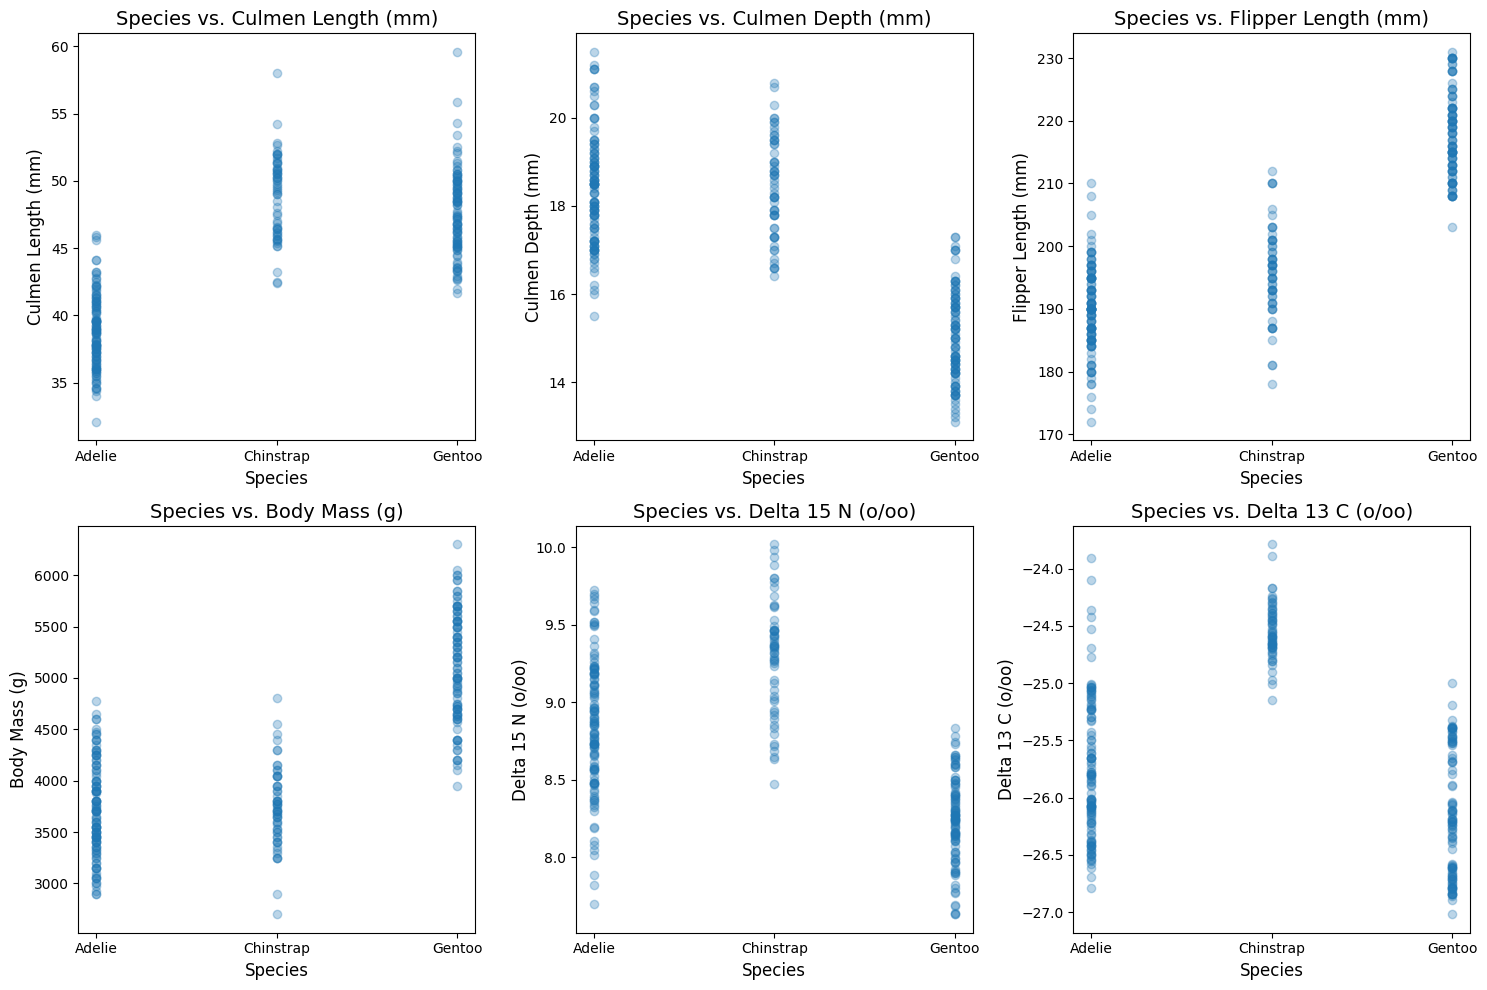

In [17]:
# Scatter Plots

# Define the column indices
column_indices = [2,3,4,5,6,7]

# Extract column names from training set using indices
selected_columns = df_train.columns[column_indices]

# Create the subplots (2 rows, 3 columns) and set the figure size
plt.figure(figsize=(15, 10))

# Fill in the subplot for each of the selected columns
for i, column in enumerate(selected_columns):
  plt.subplot(2, 3, i+1)
  plt.scatter(df_train['Species'], df_train[column], alpha=0.3) # Create the scatter plot

  # Label the x and y axis, add a title to the plot
  plt.ylabel(column, size=12)
  plt.xlabel('Species', size=12)
  plt.title(f'Species vs. {column}', size=14)

plt.tight_layout()  # Adjust layout
plt.show() # Show the plots

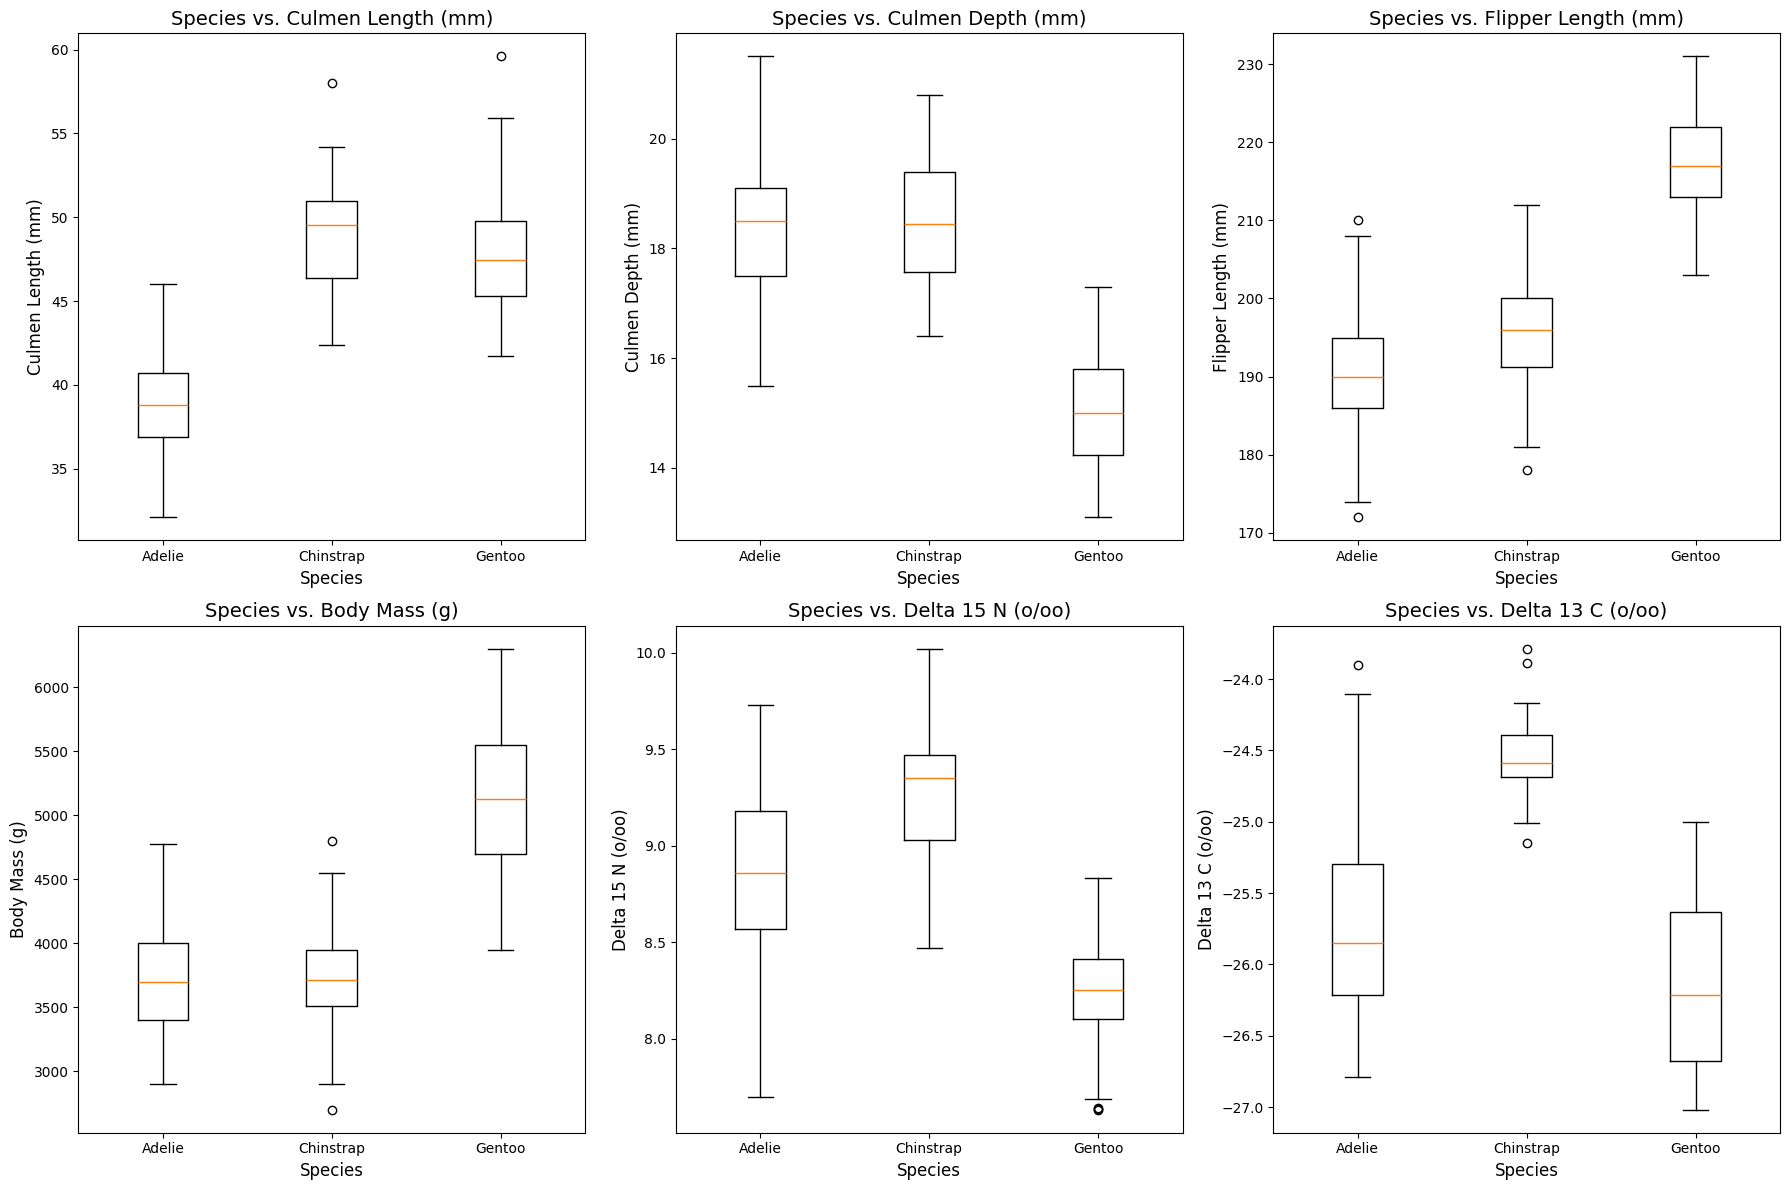

In [18]:
# Box Plots

# Create the subplots and set the figure size
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Get unique species
species_labels = df_train['Species'].unique()

# Loop through each column and create a box plot
for i, col in enumerate(selected_columns): # Using same selected columns as the scatter plots
    data = [df_train[df_train['Species'] == species][col].values for species in species_labels]
    ax[i].boxplot(data, tick_labels=species_labels) # Create the box plot

    # Give the plot a title and label the x and y axis
    ax[i].set_title(f'Species vs. {col}', size=14)
    ax[i].set_xlabel('Species', size=12)
    ax[i].set_ylabel(col, size=12)

# Adjust layout
plt.tight_layout()
plt.show() # Show the plots

The scatter plots and box plots give us similar insights into the data, but show it differently. These boxplots are very helpful in visualizing the differences in features when the data is grouped by species. For example, we can observe that for features such as `Culmen Depth (mm)` and `Body Mass (g)`, the Adelie and Chinstrap species have similar averages, while the Gentoo species is much different. Also, for features including `Flipper Length (mm)` and `Delta 15 N(o/oo)`, all three species have distinct average values. The box plots also better highlight any outliers that may be in the data.

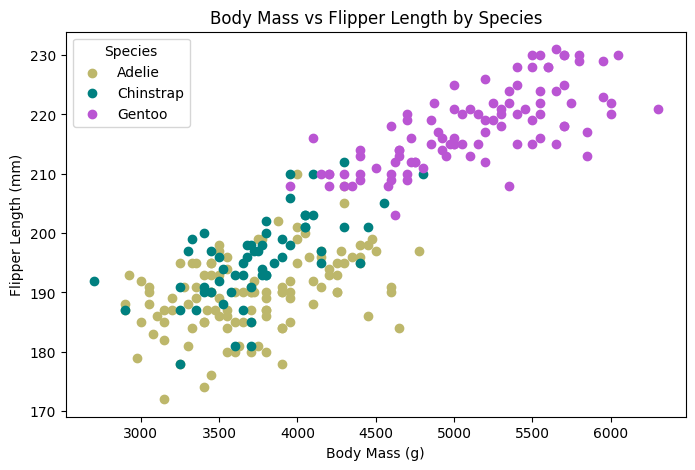

In [19]:
# Another Scatter Plot (Body Mass vs Flipper Length by Species)

# Define colors for each species
species_colors = {'Adelie': 'darkkhaki', 'Chinstrap': 'teal', 'Gentoo': 'mediumorchid'}

# Create figure and specify the size
plt.figure(figsize=(8, 5))

# Add the scatterplot for each species (on the same plot)
for species, color in species_colors.items():
    subset = df_train[df_train['Species'] == species]
    plt.scatter(subset['Body Mass (g)'],
                subset['Flipper Length (mm)'],
                color=color,
                label=species)

# Add labels, title, and legend
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.title('Body Mass vs Flipper Length by Species')
plt.legend(title='Species')

# Show the plot
plt.show()

This scatter plot shows a positive correlation between `Body Mass (g)` and `Flipper Length (mm)`. Due to this, we will likely not pick both features because if one is high, we can predict that the other is also high. Therefore, it would be redundant to treat the variables as separate features as there is a relationship observed in the plot. However, we can also see that there are clear differences in species when it comes to these values.

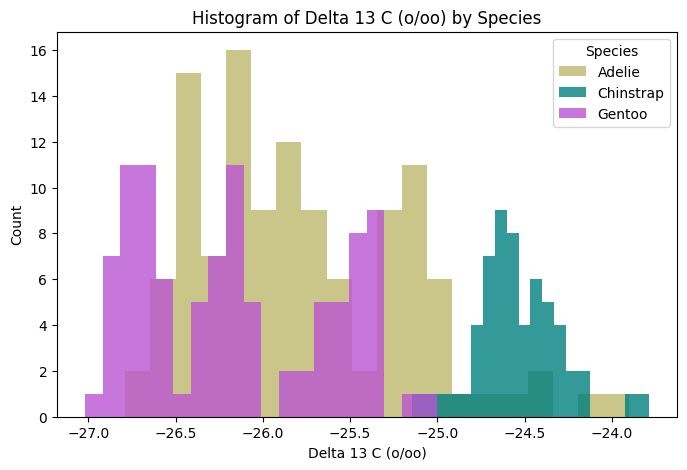

In [20]:
# Histogram (Delta 13 C (o/oo) by Species)

# Define colors for each species
species_colors = {'Adelie': 'darkkhaki', 'Chinstrap': 'teal', 'Gentoo': 'mediumorchid'}

# Create figure and specify the size
plt.figure(figsize=(8, 5))

# Plot a histogram for each species (on the same plot)
for species, color in species_colors.items():
    subset = df_train[df_train['Species'] == species]
    plt.hist(subset['Delta 13 C (o/oo)'], bins=20, alpha=0.8, color=color, label=species)

# Add labels, title, and legend
plt.xlabel('Delta 13 C (o/oo)')
plt.ylabel('Count')
plt.title('Histogram of Delta 13 C (o/oo) by Species')
plt.legend(title='Species')

# Show the plot
plt.show()

This histogram shows that the Chinstrap penguins tend to have higher values for `Delta 13 C (o/oo)` than the other two species. This could mean that `Delta 13 C (o/oo)` is a good feature to look at to determine penguin species.

## Feature Selection

We have decided to choose `Flipper Length (mm)` and `Delta 13 C (o/oo)` as our quantitative features and `Island` as our qualitative feature. From the box plots, we observed that `Flipper Length (mm)` and `Delta 13 C (o/oo)` had different average values depending on the species. This clued us in to the idea that these features would be good ones to pick. Furthermore, in the scatter plot of `Body Mass (g)` vs `Flipper Length (mm)` showed a positive correlation, so we knew that we would only want to pick one of these features. Since we could visually see that `Flipper Length (mm)` had greater differences between species, we decided to choose this feature. Finally, we chose `Island` mainly because of the table where we observed that some species do not appear on certain islands in our data. Therefore, `Island` would be a very useful indicator for predicting species. Now that we have chosen our three features, we can begin our modeling section.

## Machine Learning Models



We will first create a function to change our categorical variables to have binary values instead. This is important because it will eliminate any unintended ordering of the categorical variables and allows us to use our machine learning models.

#### One-Hot Encoding

In [21]:
# Import one-hot encoder
from sklearn.preprocessing import OneHotEncoder

def encoder(data, col):
  """
  One-hot encodes the specified column from the given data frame.

  Parameters:
  data: a data frame
  col: column to be encoded

  Returns:
  data: the updated data frame
  """
  # Avoids modifying the original DataFrame
  data = data.copy()

  # Perform one-hot encoding column
  data = pd.get_dummies(data, columns=[col], prefix=col,  dtype=int)

  return data

First, we will update our X_train and X_test to reflect our chosen features.

In [22]:
# Pick the features
selected_features=["Flipper Length (mm)", "Delta 13 C (o/oo)", "Island"]

# Update the X_train and X_test to be only including our selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Next, we will use our encoder function to **avoid repetitive code**.

In [23]:
encoded_X_train = encoder(X_train, "Island")
encoded_y_train = encoder(y_train, "Species")
encoded_X_test = encoder(X_test, "Island")

In [24]:
# Check that the encoding was successful
encoded_X_train

,Flipper Length (mm),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
138,185.0,-26.07021,0,1,0
205,203.0,-24.59066,0,1,0
172,181.0,-24.68790,0,1,0
25,187.0,-24.36130,1,0,0
154,193.0,-24.75570,0,1,0
...,...,...,...,...,...
171,195.0,-24.64335,0,1,0
91,205.0,-25.83352,0,1,0
164,185.0,-24.80526,0,1,0
177,197.0,-24.47142,0,1,0


#### Support Vector Machine

The Support Vector Machine (SVM) finds the best way of separating the data based on the categories. We will begin by performing cross-validation in order to pick the optimal hyper-parameters to pass into our model.

In [25]:
# Cross-validation

# Import SVC, cross_val_score and GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Select a range of possible values for each hyper-parameter
parameters = {'C':[0.01, 0.5, 1, 5],  'degree':[0, 1, 5, 8, 10, 20, 30], 'coef0': [0, 1]}

# Use GridSearchCV to find the best parameters
g = GridSearchCV(SVC(kernel='poly'), parameters).fit(encoded_X_train, y_train)

# Print the best parameters
print(g.best_params_)

{'C': 1, 'coef0': 1, 'degree': 20}


In [26]:
# Fit the model using the best hyper-parameters
svm_model = SVC(C=0.01, kernel='poly', degree=30, coef0=1)
svm_model.fit(encoded_X_train, y_train)
svm_y_pred = svm_model.predict(encoded_X_test)

# Find the accuracy
svm_acc = np.sum(svm_y_pred == y_test)/y_test.size
svm_acc

np.float64(0.9855072463768116)

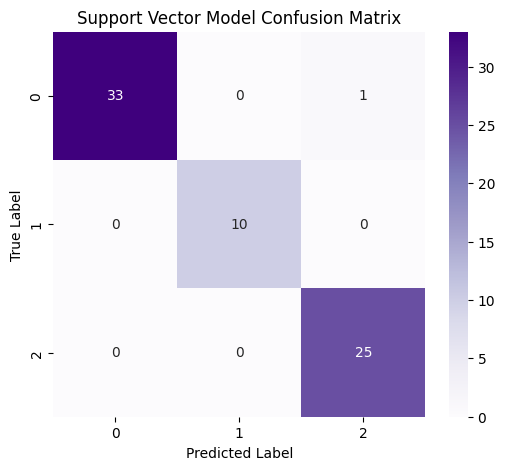

In [27]:
# Confusion Matrix

# Import libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, svm_y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Use seaborn to get a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Purples")

# Set x-axis label, y-axis label, and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Support Vector Model Confusion Matrix")

# Show the matrix
plt.show()

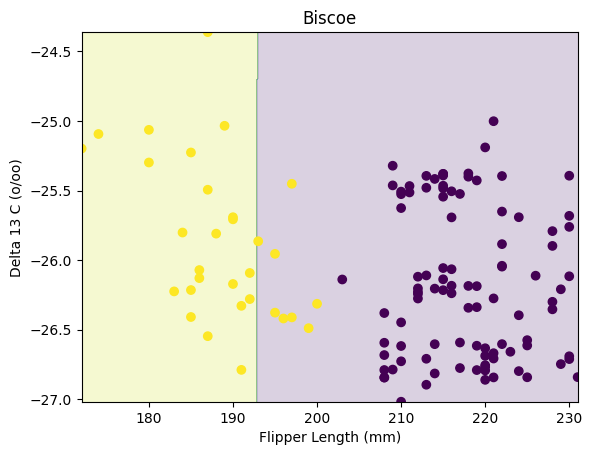

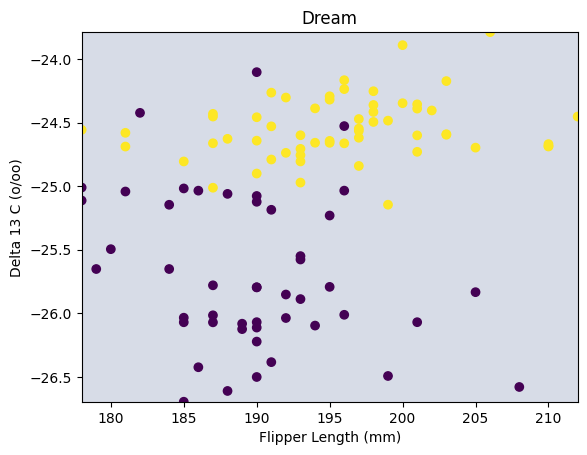

In [28]:
# Decision regions
islands = ['Biscoe', 'Dream']
for island in islands:
  simple_encoded_X_train = encoded_X_train.rename(columns = {'Island_Biscoe':'Biscoe',
                                                            'Island_Dream':'Dream',
                                                            'Island_Torgersen':'Torgersen'})
  specific_island = simple_encoded_X_train[X_train.Island == island]
  graph_X = specific_island[["Flipper Length (mm)", "Delta 13 C (o/oo)"]]

  species_as_numbers = {'Gentoo' : 0, 'Adelie' : 1, 'Chinstrap' : 2}
  graph_y = y_train.map(species_as_numbers)
  graph_y = graph_y[graph_X.index]

  x0 = graph_X["Flipper Length (mm)"]
  x1 = graph_X["Delta 13 C (o/oo)"]

  grid_x = np.linspace(x0.min(), x0.max(), 501)
  grid_y = np.linspace(x1.min(), x1.max(), 501)
  xx, yy= np.meshgrid(grid_x, grid_y)

  XX = xx.ravel()
  YY = yy.ravel()

  XY = pd.DataFrame({"Flipper Length (mm)": XX, "Delta 13 C (o/oo)": YY})
  model = SVC().fit(graph_X, graph_y)

  p = model.predict(XY)
  p = p.reshape(xx.shape)

  fig, ax = plt.subplots(1)
  ax.contourf(xx, yy, p, alpha=0.2)
  ax.scatter(x0, x1, c = graph_y)
  ax.set(xlabel = "Flipper Length (mm)", ylabel = "Delta 13 C (o/oo)")
  ax.set(title = island)
  plt.show()

#### KNN Model

The k-Nearest Neighbors (KNN) model classifies penguins by looking at the closest data points, "neighbors," and choosing the most common species. However, it can be sensitive to data distribution. To begin, we need to run cross-validation to choose complexity parameters and train our model.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# trying different k values
hyperparam = {'n_neighbors': range(5, 15)}

# make a knn model
knn = KNeighborsClassifier()

# trying cross validation to get the best k value
grid = GridSearchCV(knn, hyperparam, cv=10)
grid.fit(encoded_X_train, y_train)

# actually finding the best k value
best_k_value = grid.best_params_['n_neighbors']
print("Best k value:", best_k_value)

# training the KNN model with the best k value
best_knn_value = KNeighborsClassifier(n_neighbors=best_k_value)

#using fit
best_knn_value.fit(encoded_X_train, y_train)

Best k value: 12


KNeighborsClassifier(n_neighbors=12)

Then, we need to make the confusion matrix.

Performance of Model
Accuracy of Model: 0.9130
Confusion Matrix:
 [[32  2  0]
 [ 3  6  1]
 [ 0  0 25]]


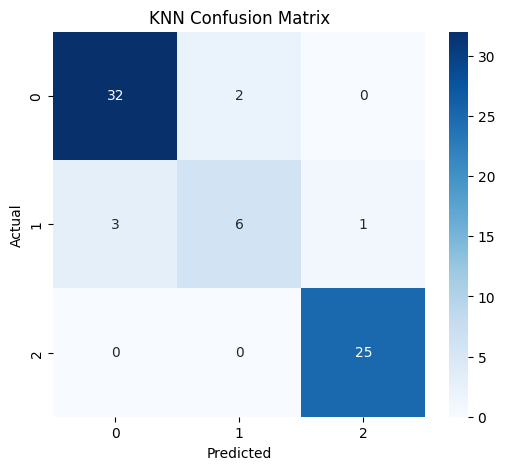

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# using trained knn to predict y
y_prediction_trained = best_knn_value.predict(encoded_X_test)

# printing outputs from the knn model
print("Performance of Model")
print(f"Accuracy of Model: {accuracy_score(y_test, y_prediction_trained):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction_trained))

# making confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_prediction_trained), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

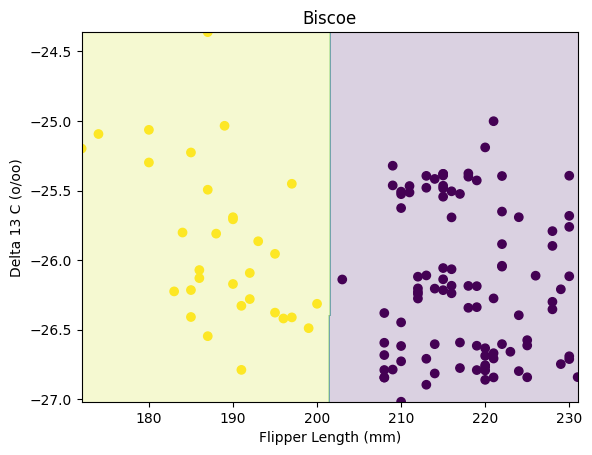

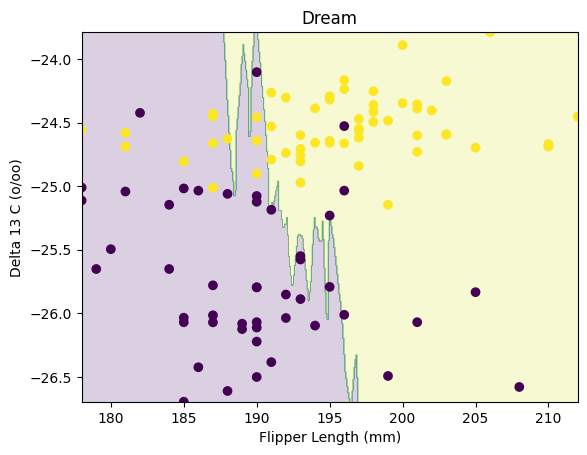

In [31]:
# Decision regions
islands = ['Biscoe', 'Dream']
for island in islands:
  simple_encoded_X_train = encoded_X_train.rename(columns = {'Island_Biscoe':'Biscoe',
                                                            'Island_Dream':'Dream',
                                                            'Island_Torgersen':'Torgersen'})
  specific_island = simple_encoded_X_train[X_train.Island == island]
  graph_X = specific_island[["Flipper Length (mm)", "Delta 13 C (o/oo)"]]

  species_as_numbers = {'Gentoo' : 0, 'Adelie' : 1, 'Chinstrap' : 2}
  graph_y = y_train.map(species_as_numbers)
  graph_y = graph_y[graph_X.index]

  x0 = graph_X["Flipper Length (mm)"]
  x1 = graph_X["Delta 13 C (o/oo)"]

  grid_x = np.linspace(x0.min(), x0.max(), 501)
  grid_y = np.linspace(x1.min(), x1.max(), 501)
  xx, yy= np.meshgrid(grid_x, grid_y)

  XX = xx.ravel()
  YY = yy.ravel()

  XY = pd.DataFrame({"Flipper Length (mm)": XX, "Delta 13 C (o/oo)": YY})
  model = best_knn_value.fit(graph_X, graph_y)

  p = model.predict(XY)
  p = p.reshape(xx.shape)

  fig, ax = plt.subplots(1)
  ax.contourf(xx, yy, p, alpha=0.2)
  ax.scatter(x0, x1, c = graph_y)
  ax.set(xlabel = "Flipper Length (mm)", ylabel = "Delta 13 C (o/oo)")
  ax.set(title = island)
  plt.show()

#### Multinomial Logistic Regression Model

The Multinomial Logistic Regression model estimates and assigns probabilities to each penguin species and classifies based on the highest probability. Since the hyperparameters for a logistic regression model of this sample size is more defined (multi_class='multinomial', solver='lbfgs'), our cross-validation will look at the average accuracy score over different sample sets.

In [32]:
# Check that the columns are properly encoded before beginning to run the model.
print(encoded_X_train.columns)

Index(['Flipper Length (mm)', 'Delta 13 C (o/oo)', 'Island_Biscoe',
       'Island_Dream', 'Island_Torgersen'],
      dtype='object')


Accuracy: 0.9420
Confusion Matrix:
 [[32  1  1]
 [ 2  8  0]
 [ 0  0 25]]


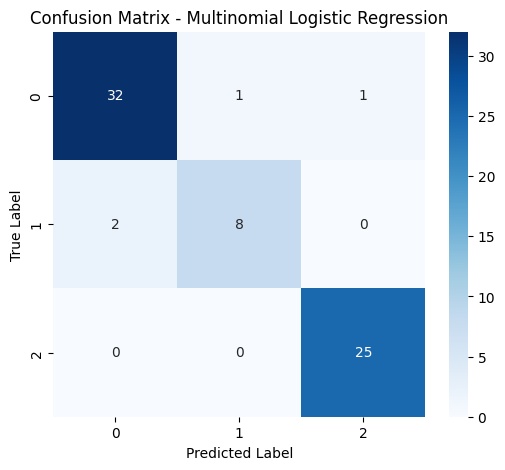

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(encoded_X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(encoded_X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

# Display confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.show()

Then, doing cross validation for logistic regression

In [34]:
# Cross Validation for Logistic Regression
cross_validation = cross_val_score(logreg, encoded_X_train, y_train, cv=5)
print(f"Cross Validation Scores: {cross_validation}")
print(f"Mean Cross Validation Score: {np.mean(cross_validation)}")

Cross Validation Scores: [0.92727273 0.90909091 0.98181818 0.94444444 0.94444444]
Mean Cross Validation Score: 0.9414141414141415


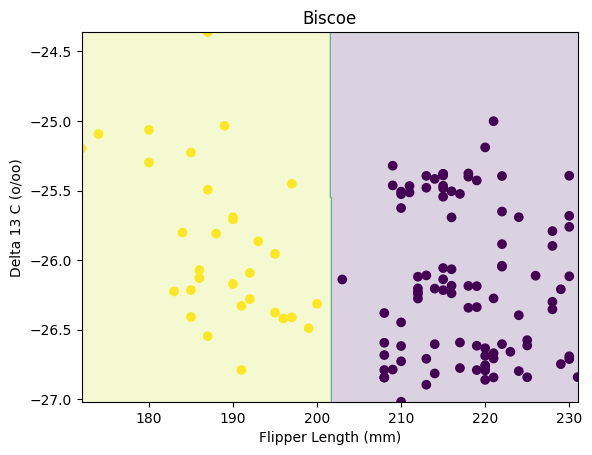

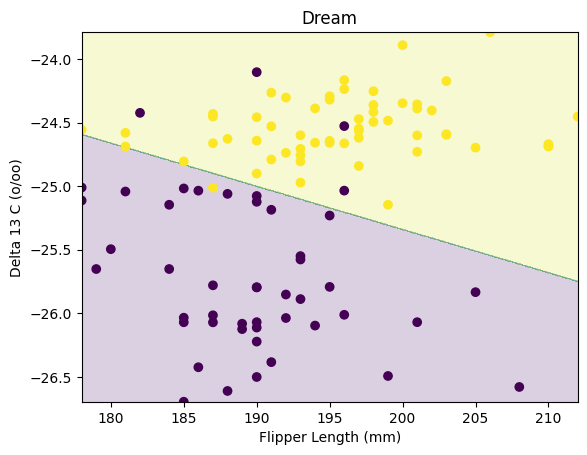

In [35]:
# Decision regions
islands = ['Biscoe', 'Dream']
for island in islands:
  simple_encoded_X_train = encoded_X_train.rename(columns = {'Island_Biscoe':'Biscoe',
                                                            'Island_Dream':'Dream',
                                                            'Island_Torgersen':'Torgersen'})
  specific_island = simple_encoded_X_train[X_train.Island == island]
  graph_X = specific_island[["Flipper Length (mm)", "Delta 13 C (o/oo)"]]

  species_as_numbers = {'Gentoo' : 0, 'Adelie' : 1, 'Chinstrap' : 2}
  graph_y = y_train.map(species_as_numbers)
  graph_y = graph_y[graph_X.index]

  x0 = graph_X["Flipper Length (mm)"]
  x1 = graph_X["Delta 13 C (o/oo)"]

  grid_x = np.linspace(x0.min(), x0.max(), 501)
  grid_y = np.linspace(x1.min(), x1.max(), 501)
  xx, yy= np.meshgrid(grid_x, grid_y)

  XX = xx.ravel()
  YY = yy.ravel()

  XY = pd.DataFrame({"Flipper Length (mm)": XX, "Delta 13 C (o/oo)": YY})
  model = logreg.fit(graph_X, graph_y)

  p = model.predict(XY)
  p = p.reshape(xx.shape)

  fig, ax = plt.subplots(1)
  ax.contourf(xx, yy, p, alpha=0.2)
  ax.scatter(x0, x1, c = graph_y)
  ax.set(xlabel = "Flipper Length (mm)", ylabel = "Delta 13 C (o/oo)")
  ax.set(title = island)
  plt.show()

***Note! While there are only 2 decision region subplots for our models, this is because on the Torgersen Island, the samples only contain the Adelie Species. Therefore, the decision region would be a one color contour plot only.***

## Conclusions


Our models were effective in predicting the species when we used our selected features (`Flipper Length (mm)`, `Delta 13 C (o/oo)`, and `Island`) as predictors. We decided on these features by plotting the relationship between various features to find which combination of them was most effective. Our chosen features were distinct to each species, which was shown most extremely in our box plot analysis, so we felt confident about moving forward with our selection. Due to the random test splitting, each model gives us a different accuracy everytime, but all accuracy scores are consistently over 90%, and **we were able to get an accuracy of 97%**. Further, by using **cross validation, we found the best hyperparameters for each model** to train our data set. Our best model was our SVM model compared to our KNN and logistic regression models, which consistently got the highest accuracy. A limitation of the SVM model is that the accuracy score had a large variation based on the hyper-parameters used. This means that it is really important to choose the best ones, which can change each time the code is run. A limitation of our KNN model specifically is that it is sensitive to data distribution, which could have been a reason for the lower relative accuracy. We also observe from the decision regions of the KNN model that there are certain curves in the decision boundary which may suggest the issue of overfitting. For the multinomial logistic model, a limitation is that it assumes linearity in the feature relationships. So, from the decision regions for that model, we see a very clear cut (straight line) boundary that might not capture the full relationship (if non-linear). However, to improve our accuracy across all other models in the future, we could increase sample size for the Chinstrap species because it is much lower than the Adelie and Gentoo species—which are about the same. If we increased the sample size, we would have more training data for the models to train on, which would consequently more accurately represent the population of penguins in species.


